#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import wandb

wandb.login(key="c468f0a8ae0c118cf6cc735f7c2b1e8f6365a3c5")
wandb.init(project="distance-classification")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [29]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
  
## Convert the image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Total number of faces detected are: {}".format(len(faces_rect))
font = cv2.FONT_HERSHEY_COMPLEX
font_scale = 1.5
font_color = (0, 0, 255)  # Red color in BGR format
font_thickness = 2

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (50, 50), font, font_scale, font_color, font_thickness)
# wandb.log({"faces_rect": wandb.Image(faces_rect)})
wandb.log({"image": wandb.Image(img)})
## Display the image and window title should be "Total number of face detected are #"  
# cv2.imshow("Total number of face detected are {}".format(len(faces_rect)), img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

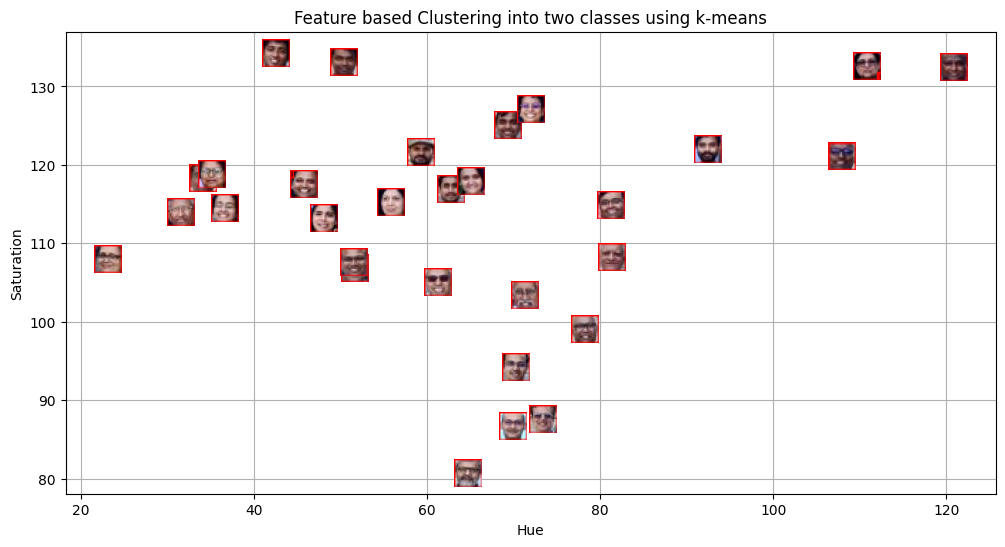

In [21]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(img[y:y+h, x:x+w], (20, 20)), cv2.COLOR_BGR2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Feature based Clustering into two classes using k-means')
plt.grid(True)
# plt.show()

wandb.log({"kmeans": wandb.Image(plt)})

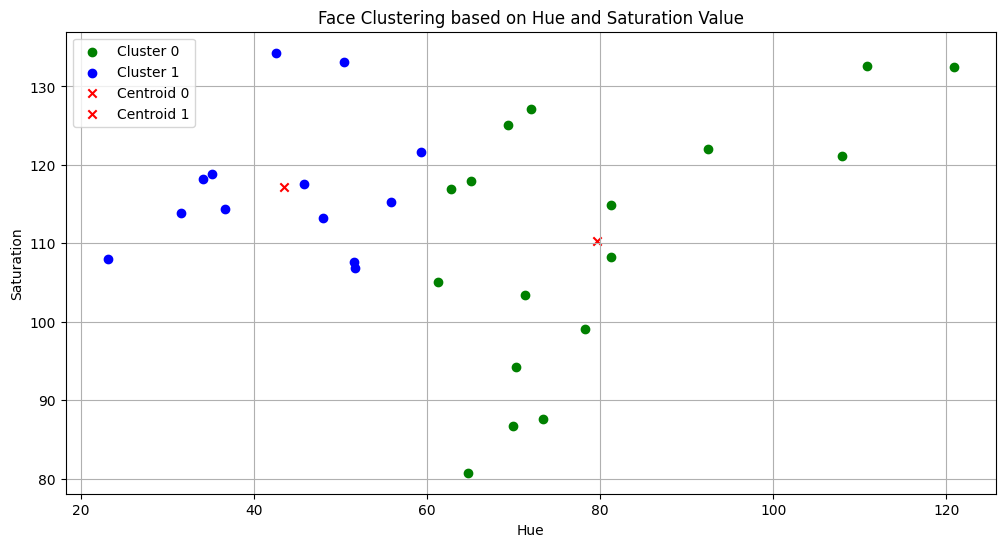

In [22]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='r', marker='x', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='r', marker='x', label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Face Clustering based on Hue and Saturation Value')
plt.legend()
plt.grid(True)
# plt.show()

wandb.log({"scatter": wandb.Image(plt)})

In [26]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
wandb.log({"template_faces": wandb.Image(template_img)})
# cv2.imshow('Template Image with Detected Faces', template_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()      

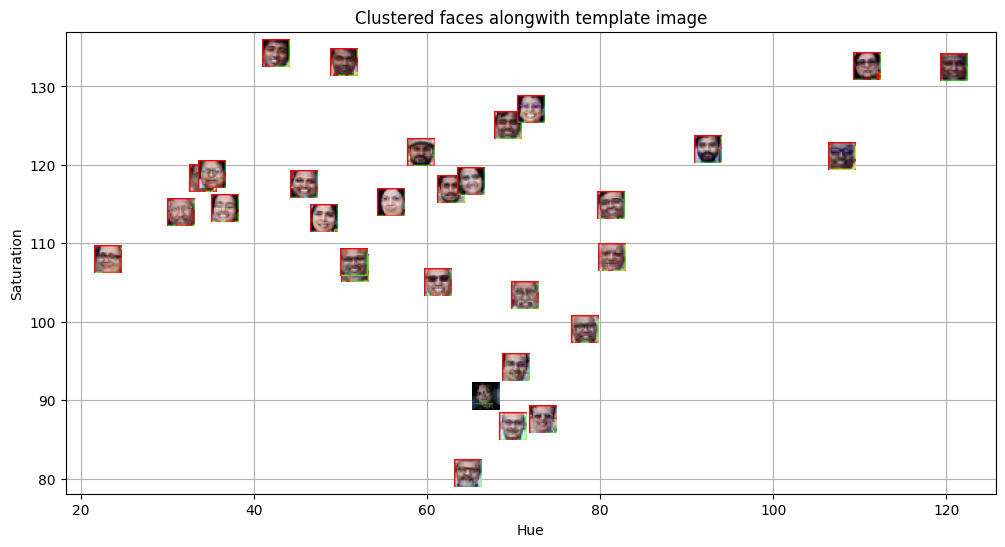

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)


plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clustered faces along with template image')
plt.grid(True)
# plt.show()

wandb.log({"clustered_faces": wandb.Image(plt)})

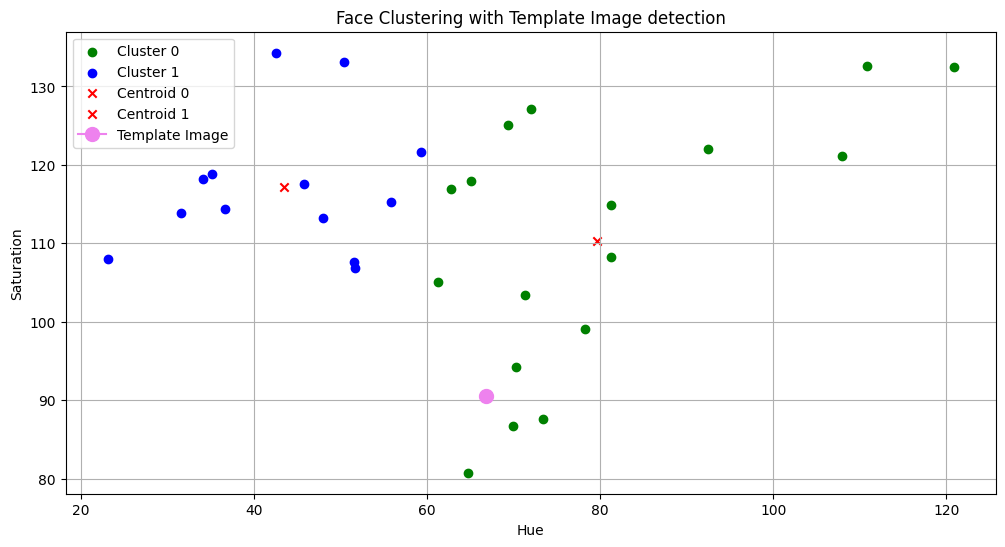

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='r', marker='x', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='r', marker='x', label='Centroid 1') ## plot for centroid 1

# Plot the template image point
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Template Image')

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Face Clustering with Template Image detection')
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# Show the plot 
# plt.show()

wandb.log({"clustered_faces_with_template": wandb.Image(plt)})

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
answer -> Euclidean
 Mahalanobis
 Manhattan
 Chebyshev
 Minkowski
 Cosine
 Hamming

#### 2. What are some real-world applications of distance-based classification algorithms? 
answer ->  Face Recognition ,Product Categorization, Malware Categorization ,Emotion Classification , Fraud Detection ,  Disease Classification , Speech Recognition

#### 3. Explain various distance metrics. 
answer -> Euclidean Distance: Measures the straight-line distance between two points in a multi-dimensional space.

Mahalanobis Distance: Accounts for correlations in the dataset and scales data based on variance. It is useful in multivariate data.

Manhattan Distance (Taxicab Distance): Measures distance by summing absolute differences along each axis. Used when movement is restricted to grid-based paths.

Chebyshev Distance: Measures the maximum absolute coordinate difference; useful for scenarios where diagonal movement has the same cost as horizontal/vertical movement.

Minkowski Distance: A generalization of both Euclidean and Manhattan distances, controlled by parameter p. When p=2, it becomes Euclidean; when p=1, it becomes Manhattan.

Cosine Similarity (Not technically a distance metric): Measures the cosine of the angle between two vectors, useful for text similarity. Distance is typically defined as 1 - cosine similarity.

Hamming Distance: Counts the number of differing positions between two strings or binary sequences. Used in error detection, coding theory, and text processing.

#### 4. What is the role of cross validation in model performance? 
answer ->Cross-validation helps assess a model’s ability to generalize by repeatedly splitting the dataset into training and testing subsets. It reduces overfitting risks and ensures a more robust estimate of performance across different data splits.

#### 5. Explain variance and bias in terms of KNN? 
answer ->Variance: Sensitivity to small changes in training data. A low k (e.g., k=1) makes the model highly responsive to individual data points, increasing variance.
Bias: The difference between predicted values and actual values. A high k (e.g., k=20) smooths predictions, reducing variance but increasing bias, as it may not capture local patterns.